In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from olympus.emulators import Emulator
from olympus.scalarizers import Scalarizer

from olympus.utils.misc import get_hypervolume


sns.set(style='ticks', context='notebook', font_scale=1.2)
from cmcrameri import cm

In [ ]:
emulator_i = Emulator(dataset='suzuki_i', model='BayesNeuralNet')
emulator_ii = Emulator(dataset='suzuki_ii', model='BayesNeuralNet')
emulator_iii = Emulator(dataset='suzuki_iii', model='BayesNeuralNet')
emulator_iv = Emulator(dataset='suzuki_iv', model='BayesNeuralNet')

In [ ]:
print(emulator_i.param_space)

In [ ]:
# generate design points
cat_options = ['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']

NUM_POINTS = 10000

X = []

for _ in range(NUM_POINTS):
    X_ = []
    X_.append(np.random.choice(cat_options, size=None))
    X_.append(np.random.uniform(60., 600., size=None))
    X_.append(np.random.uniform(30., 110., size=None))
    X_.append(np.random.uniform(0.498, 2.515, size=None))
    X.append(X_)

In [ ]:
y_i, _, __= emulator_i.run(X)
y_ii, _, __= emulator_ii.run(X)
y_iii, _, __= emulator_iii.run(X)
y_iv, _, __= emulator_iv.run(X)

In [ ]:
y = np.stack((y_i, y_ii, y_iii, y_iv), axis=-2)
y.shape

In [ ]:
y_mean = np.mean(y,axis=-2)
y_mean.shape

In [ ]:
# compute average hypervolume for each point
# merits = scalarizer.scalarize(y_mean)
# print(merits.shape)
# best_idx = np.argmin(merits)
# print(merits[best_idx])
# print(y_mean[best_idx])
# best_X = X[best_idx]
# print(best_X)
w_ref = np.array([-0., -0.])

merits = get_hypervolume(-y_mean, w_ref)
merits

## Analyze results

In [3]:
res_gen_ = pickle.load(open('general_results.pkl', 'rb'))
res_full_ = pickle.load(open('full_obj_results.pkl', 'rb'))

num_exps = 30
num_full_exps = num_exps//4
# take only a subset of experiments
res_gen = []
for res in res_gen_:
    res_gen.append(res.iloc[:num_exps,:])
res_full = []
for res in res_full_:
    res_full.append(res.iloc[:num_full_exps,:])
    

len(res_gen), len(res_full)

FileNotFoundError: [Errno 2] No such file or directory: 'general_results.pkl'

In [24]:
w_ref = np.array([-0., -0.])

hvols_gen = []
hvols_full = []
# compute hypervolumes after experiment terminated
for res in res_gen:
    hvol = get_hypervolume(-res[['yield', 'turnover']].values, w_ref)
    hvols_gen.append(hvol)
for res in res_full:
    hvol = get_hypervolume(-res[['yield', 'turnover']].values, w_ref)
    hvols_full.append(hvol)
    
plot_df = pd.DataFrame({
    'strategy': ['general' for _ in range(len(res_gen))] + ['full_obj' for _ in range(len(res_full))],
    'hvol': hvols_gen+hvols_full,
})

max_, min_ = plot_df['hvol'].max(), plot_df['hvol'].min()
print(max_, min_)
plot_df['norm_hvol'] = (plot_df['hvol'] - min_) /(max_-min_)

3381.733869421204 180.67980212872456


/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_836/1699477270.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


Text(0.5, 0, 'Strategy')

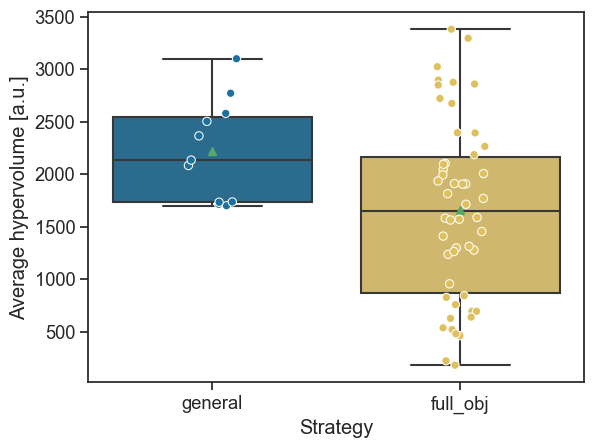

In [47]:
fig, ax = plt.subplots()
palette = {'general': '#1a709f', 'full_obj': '#dfc05e'}

sns.boxplot(data=plot_df, x='strategy', y='hvol', ax=ax, palette=palette, showmeans=True)
sns.stripplot(
    data=plot_df, x='strategy', y='hvol',  ax=ax, palette=palette, 
    edgecolor='#ffffff', linewidth=0.75, size=6,
             )

#ax.axhline(merits, c='k', ls='--', alpha=0.5)

ax.set_ylabel('Average hypervolume [a.u.]')
ax.set_xlabel('Strategy')

<Axes: xlabel='strategy', ylabel='norm_hvol'>

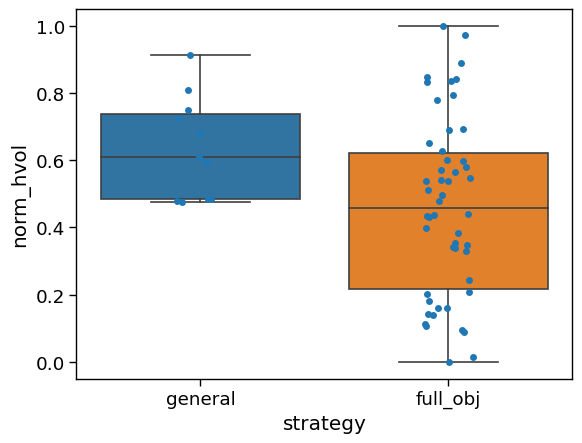

In [26]:
fig, ax = plt.subplots()

sns.boxplot(data=plot_df, x='strategy', y='norm_hvol', ax=ax)
sns.stripplot(data=plot_df, x='strategy', y='norm_hvol', ax=ax)

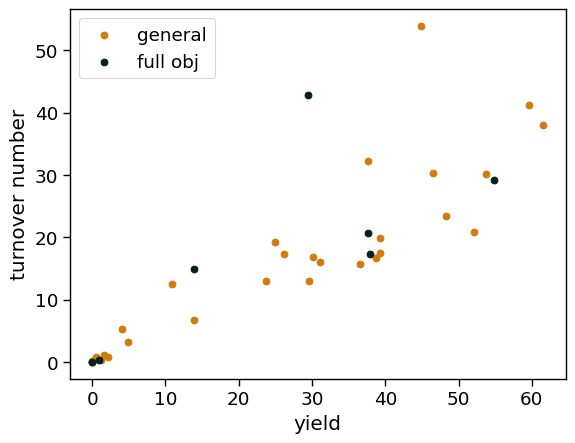

In [27]:
fig, ax = plt.subplots()

run_ix = 
obj_gen = res_gen[run_ix][['yield', 'turnover']].values
obj_full = res_full[run_ix][['yield', 'turnover']].values

ax.scatter(obj_gen[:,0], obj_gen[:,1], c='#D17B0F', label='general')
ax.scatter(obj_full[:,0], obj_full[:,1], c='#05201c', label='full obj')

ax.set_xlabel('yield')
ax.set_ylabel('turnover number')

ax.legend()

In [ ]:
res_full[3]